In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

### SIR model
#### is used to described the spread of an infectious disease. It divides populations into fractions ;
S-'susceptible', I-'infectious', and R-'recovered/removed'.

#### The last group may recovered from disease, or dead, and so can't be reinfected back into the system. The simulation runs on a discrete time steps of $dt$, and so each fraction of population can be expressed into sets of differential equations:

### $ \frac{dS}{dt} = -\beta S I$

### $ \frac{dI}{dt} = \beta S I - \gamma I $

### $ \frac{dR}{dt} = \gamma I $


#### where $\beta dt$ is the probability of infection (S turning into I), and the probability of recovering/removed (I to R) is $\gamma dt$. Subsequebtly, the fraction $\beta / \gamma$ determines how many individuals can one infected person spread their disease to. 

#### We will then use parameters from covid19 in this model to see its progression. 
For covid19 the ratio is:

### $\frac{\beta}{\gamma} = 2 $ 

#### The value $\gamma$ can also be thought of as the inverse of the "time period where an individual is infectious" . Therefore, time period of I state is $ \approx 1/\gamma$

In [39]:
# Using the covid 19 parameter:
Gamma = 1/2       # so the time period is 2 weeks
Beta  = 2*Gamma   

### initial condition
We can start with small number of infection, and most importantly R population at time 0 is 0


In [5]:
I0 = 1e-5
R0 = 0

#### Now we shall solve the differential equations by using 4th order Runge Kutta integrator (any other integrator such as Euler is also okay)

In [2]:
def RK4(y,h,f):                    # 4th order runge kutta algoritm. 
    k1 = f(y)                      # h = step size
    k2 = f(y+(h/2)*k1,)
    k3 = f(y+(h/2)*k2)
    k4 = f(y+ h*k3   )
    return y + h*(k1+k2+k3+k4)/6


def InfectRK4(S,I,R,beta,gamma, h,nmax ):    
    Sarray = []
    Iarray = []
    Rarray = []
    I=I
    S=S
    R=R
    beta,gamma = beta,gamma
    for i in range(nmax):         # 1 timestep is one week
        
        dS = lambda S: - beta * S * I
         
        dI = lambda I: beta*S*I - gamma*I
        
        dR = lambda R: gamma*I +R*0
        
        S = RK4(S,h,dS)
        I = RK4(I,h,dI)
        R  = RK4(R,h,dR)
        
    
        Sarray.append(S)
        Iarray.append(I)
        Rarray.append(R)
 
        
    return Sarray,Iarray,Rarray


In [40]:
#activate the integrator with our initial values, where nmax is the total number of steps we will solve for

S1,I1,R1 = InfectRK4( S=1, I=I0, R=R0, beta=Beta, gamma=Gamma, h=0.01, nmax= 8000 )

#### Now we can plot the progression of the disease with respect to time

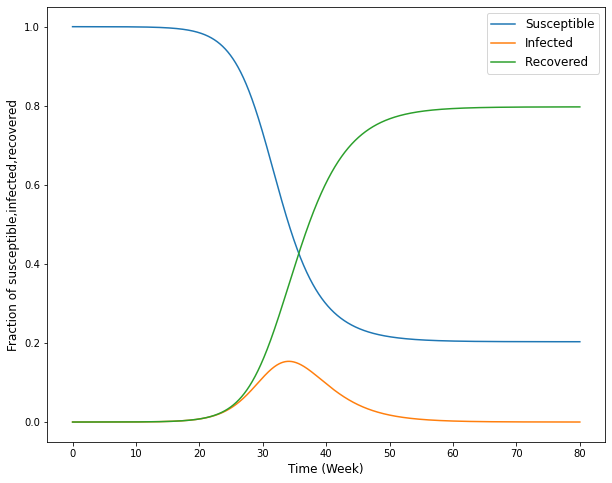

In [41]:
plt.figure(figsize=(10, 8))

time = np.linspace(0,80,8000)

plt.ylabel('Fraction of susceptible,infected,recovered',fontsize='12')
plt.xlabel('Time (Week)',fontsize='12')


plt.plot(time,S1,label='Susceptible')
plt.plot(time,I1,label='Infected')
plt.plot(time,R1,label='Recovered ')

plt.legend(prop = { "size": 12 })
plt.show()

Here, it shows that, with the initial infected fraction is 1 in 100,000 , the disease (with $\frac{\beta}{\gamma} = 2 $ ) would eventually comes to a halt. However, this is not a realistic representation of COVID19 at all as the model is missing several factors such as;

1. It lacks the intermediate state where a person is not an active virus spreader. For there is a waiting period of time between when someone contacted covid and when they become infectious. Therefore, an extra parameter is needed between S and IR

2. Super spreader
is a prominent characteristic of a spread during covid19, that is, a small fraction of infectious people are responsible for large majority of the infection. The Infectivity of individuals vary, Hence why the model should not rely on a single parameter such as b/gamma . Else it could not reproduce the infection curve of covid

#### We can also play around and change the parameters, for example, using $\frac{\beta}{\gamma} = 10 $ that reflects a highly infectious disease such as measles.
Additionally, $\gamma=4/7$ is used because the infectious period of measles is 4 days. (source:NHS)

In [34]:
Gamma = 7/4      # period is 4/7 weeks
Beta  = 10*Gamma 
NMAX  = 800
S2,I2,R2 = InfectRK4( S=1, I=I0, R=R0, beta=Beta, gamma=Gamma, h=0.01, nmax= NMAX )

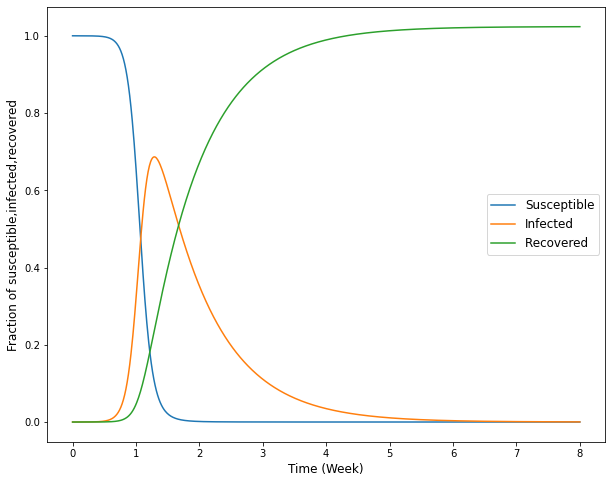

In [35]:
plt.figure(figsize=(10, 8))

time = np.linspace(0,8,NMAX)

plt.ylabel('Fraction of susceptible,infected,recovered',fontsize='12')
plt.xlabel('Time (Week)',fontsize='12')


plt.plot(time,S2,label='Susceptible')
plt.plot(time,I2,label='Infected')
plt.plot(time,R2,label='Recovered ')

plt.legend(prop = { "size": 12 })
plt.show()

Here we see that Measles wiped up the population in a much quicker time, compared to the time scale of the previous case